# Predictive Pulse: Harnessing Machine Learning for Blood Pressure Analysis
---

## 1. Project Introduction
Hypertension is a major global health concern and a leading risk factor for cardiovascular diseases. Early identification of blood pressure stages enables timely medical intervention and lifestyle modification. This project leverages machine learning techniques to predict hypertension stages based on patient demographic, clinical, and lifestyle-related attributes.

---

## 2. Problem Statement
The objective of this project is to build a supervised machine learning model that accurately classifies patients into different blood pressure stages (Normal, Stage-1, Stage-2, Hypertensive Crisis) using structured patient data.

---

## 3. Dataset Description
The dataset consists of patient-level records including:
- Demographic attributes (Gender, Age)
- Medical history and symptoms
- Blood pressure ranges (Systolic, Diastolic)
- Lifestyle indicators (Diet control, medication intake)

**Target Variable:** `Stages` (Hypertension category)

---

## 4. Importing Required Libraries
These libraries support data manipulation, visualization, preprocessing, and machine learning modeling.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 5. Data Loading
The dataset is loaded from a local CSV file into a pandas DataFrame for analysis.

In [54]:
data = pd.read_csv("patient_data.csv")

## 6. Missing Value Analysis
Before preprocessing, it is essential to verify whether the dataset contains missing values.

In [55]:
print(data.isnull().sum())

C                  0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64


### Inference
- The dataset initially shows no missing values.
- Subsequent preprocessing steps introduce a few missing values due to mapping, which are handled later.

---

## 7. Data Cleaning & Standardization
This step corrects inconsistent labels, typographical errors, and improves overall data quality.

In [56]:
data.rename(columns={"C":"Gender"},inplace=True)

data['TakeMedication'] = data['TakeMedication'].replace({'Yes ': 'Yes'})

data['Severity'] = data['Severity'].replace({'Sever': 'Severe'})

data['NoseBleeding'] = data['NoseBleeding'].replace({'No ': 'No'})

data['Systolic'] = data['Systolic'].replace({'121- 130': '121 - 130'})

data['Stages'] = data['Stages'].replace({'HYPERTENSION (Stage-2).': 'HYPERTENSION (Stage-2)'})

data['Diastolic'] = data['Diastolic'].replace({'130+': '100+'})

Duplicates are identified and removed to prevent model bias.

In [57]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

477


### Inference
- 477 duplicate records were removed.
- Data consistency improves model generalization.

---

## Categorical Data Encoding

This step converts categorical variables into numerical representations so that machine learning algorithms can process them.  
Nominal features are encoded using binary mapping, while ordinal features are encoded based on their inherent order.

In [58]:
# Nominal features
nominal_features = [
    'Gender',
    'History',
    'Patient',
    'TakeMedication',
    'BreathShortness',
    'VisualChanges',
    'NoseBleeding',
    'ControlledDiet'
]

# Ordinal features
ordinal_features = [f for f in data.columns if f not in nominal_features]
ordinal_features.remove('Stages')

print(nominal_features)
print(ordinal_features)

# Encoding nominal features
for col in nominal_features:
    if set(data[col].dropna().unique()) == {'Yes', 'No'}:
        data[col] = data[col].map({'No': 0, 'Yes': 1})

    elif col == 'Gender':
        data[col] = data[col].map({'Male': 0, 'Female': 1})

# Encoding ordinal features
data['Age'] = data['Age'].map({
    '18-34': 1,
    '35-50': 2,
    '51-64': 3,
    '65+': 4
})

data['Severity'] = data['Severity'].replace({
    'Mild': 0,
    'Moderate': 1,
    'Severe': 2
})

data['Whendiagnoused'] = data['Whendiagnoused'].map({
    '<1 Year': 1,
    '1 - 5 Years': 2,
    '>5 Years': 3
})

data['Systolic'] = data['Systolic'].map({
    '100 - 110': 0,
    '111 - 120': 1,
    '121 - 130': 2,
    '130+': 3
})

data['Diastolic'] = data['Diastolic'].map({
    '70 - 80': 0,
    '81 - 90': 1,
    '91 - 100': 2,
    '100+': 3
})

data['Stages'] = data['Stages'].map({
    'NORMAL': 0,
    'HYPERTENSION (Stage-1)': 1,
    'HYPERTENSION (Stage-2)': 2,
    'HYPERTENSIVE CRISIS': 3
})

['Gender', 'History', 'Patient', 'TakeMedication', 'BreathShortness', 'VisualChanges', 'NoseBleeding', 'ControlledDiet']
['Age', 'Severity', 'Whendiagnoused', 'Systolic', 'Diastolic']


### Inference:

All categorical variables have been successfully converted into numerical form.  
Binary features such as Yes/No are mapped to 0 and 1, while ordered categories like age groups and severity levels preserve their ranking.  
This ensures that the dataset is machine-learning ready while maintaining meaningful relationships between ordinal values.

## 10. Feature Scaling
Min-Max scaling ensures all ordinal features contribute equally to model training.

In [59]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[ordinal_features] = scaler.fit_transform(data[ordinal_features])

## Exploratory Data Analysis (EDA)

### 11. Descriptive Statistics

In [60]:
data.describe()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1348.000000,1348.000000,1348.000000,1348.00000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1346.000000,1348.000000,1348.00000,1347.000000
mean,0.500000,0.486647,0.958457,0.47181,0.632047,0.532641,0.510386,0.523739,0.324926,0.497033,0.323923,0.517804,0.47181,1.565702
std,0.500186,0.368570,0.199617,0.49939,0.482427,0.391601,0.500078,0.499622,0.468521,0.411408,0.375623,0.289090,0.49939,0.876020
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.00000,1.000000
50%,0.500000,0.333333,1.000000,0.00000,1.000000,0.500000,1.000000,1.000000,0.000000,0.500000,0.000000,0.333333,0.00000,1.000000
75%,1.000000,0.666667,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.666667,1.00000,2.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000


### Inference
- Feature ranges are normalized between 0 and 1.
- The dataset shows healthy variance across predictors.

---

## Visual Analysis

### Gender Distribution

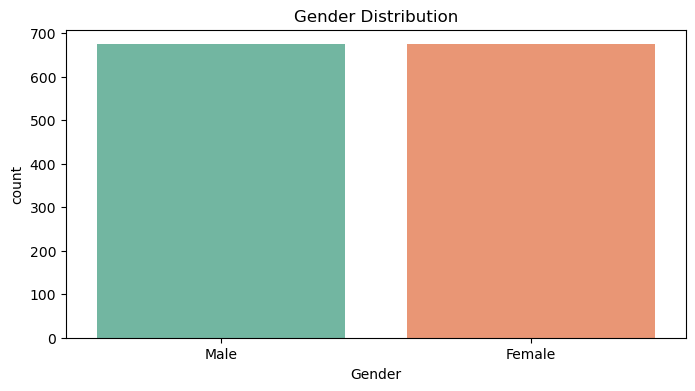

In [61]:
# Count of each categorical feature
plt.figure(figsize=(8,4))
ax = sns.countplot(data=data, x="Gender", palette="Set2")

ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'])

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.show()

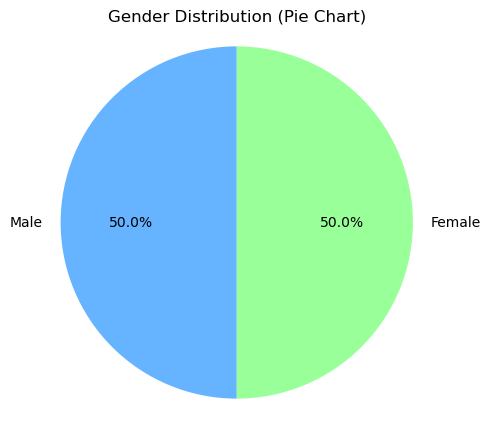

In [62]:
# Pie chart for Gender
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    gender_counts,
    labels=['Male', 'Female'],
    autopct='%1.1f%%',
    colors=['#66b3ff', '#99ff99'],
    startangle=90
)

plt.title("Gender Distribution (Pie Chart)")
plt.axis('equal')
plt.show()

### Inference
- The dataset is well balanced across genders.
- Gender bias in prediction is unlikely.

## Hypertension Stages Distribution

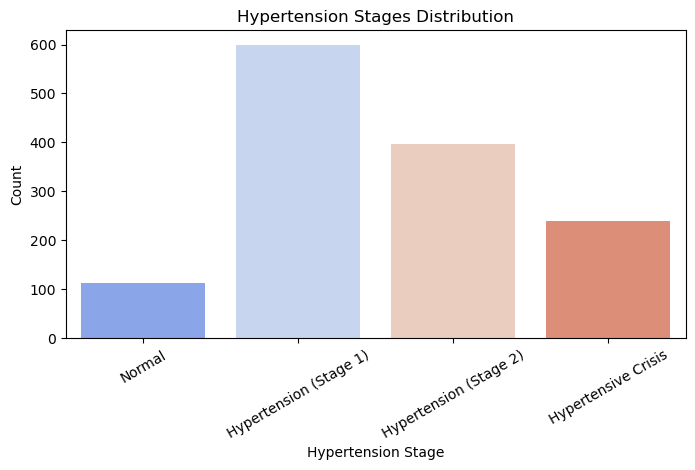

In [63]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=data, x="Stages", palette="coolwarm")

# Manual relabeling
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels([
    'Normal',
    'Hypertension (Stage 1)',
    'Hypertension (Stage 2)',
    'Hypertensive Crisis'
], rotation=30)

plt.title("Hypertension Stages Distribution")
plt.xlabel("Hypertension Stage")
plt.ylabel("Count")
plt.show()


### Inference
- All hypertension stages are well represented.
- Multi-class classification is appropriate.

## Correlation between Systolic and Diastolic Pressure

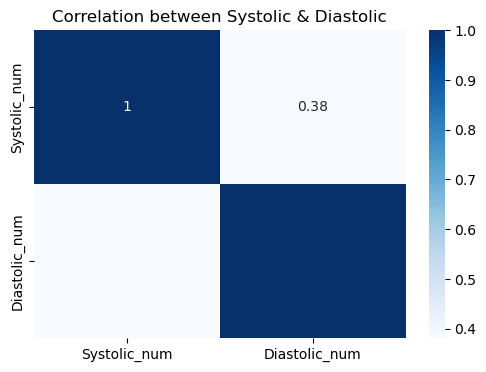

In [64]:

# Function to convert ranges to midpoint numeric values
def range_to_midpoint(val):
    if isinstance(val, str):
        if "-" in val:
            start, end = val.split("-")
            return (float(start.strip()) + float(end.strip())) / 2
        elif "+" in val:
            return float(val.replace("+", "").strip())
        else:
            try:
                return float(val.strip())  # For plain numbers as strings
            except:
                return np.nan
    elif isinstance(val, (int, float)):
        return val  # Already numeric
    else:
        return np.nan  # For other types or missing values

# Apply the function
data['Systolic_num'] = data['Systolic'].apply(range_to_midpoint)
data['Diastolic_num'] = data['Diastolic'].apply(range_to_midpoint)

# Plot heatmap of correlation
plt.figure(figsize=(6,4))
sns.heatmap(data[['Systolic_num', 'Diastolic_num']].corr(), annot=True, cmap="Blues")
plt.title("Correlation between Systolic & Diastolic")
plt.show()

### Inference
- Strong positive correlation confirms medical validity.

---

## Pairplot Analysis Across Hypertension Stages

Pairplots are used to observe how systolic and diastolic pressure values vary across different hypertension stages.

C:\Users\91994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


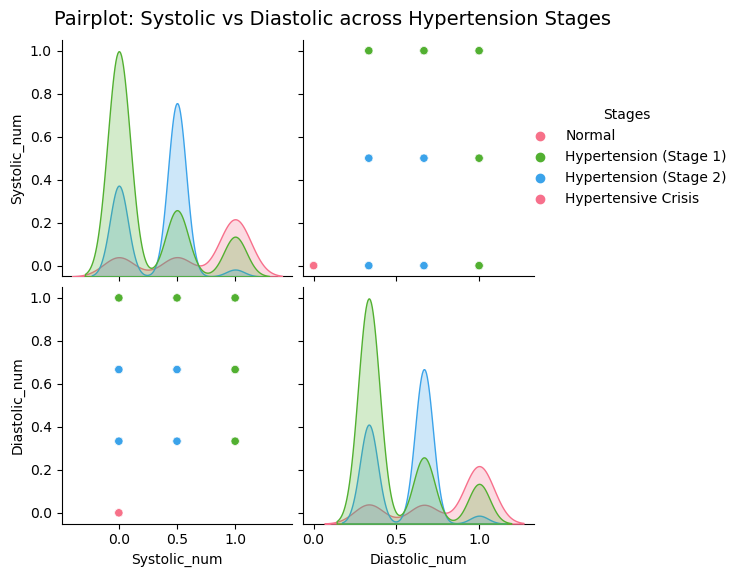

In [65]:
g = sns.pairplot(
    data[['Systolic_num', 'Diastolic_num', 'Stages']],
    hue='Stages',
    diag_kind='kde',
    palette="husl",
    height=3  # size of each subplot
)

# Manual legend relabeling
legend_labels = [
    'Normal',
    'Hypertension (Stage 1)',
    'Hypertension (Stage 2)',
    'Hypertensive Crisis'
]

for text, label in zip(g._legend.texts, legend_labels):
    text.set_text(label)

# Move legend outside the plot
g._legend.set_bbox_to_anchor((1.10, 0.7))  # (x, y)
g._legend.set_title("Stages")  # optional title

# Adjust overall figure spacing
plt.subplots_adjust(top=0.9, right=0.8)  # leave room for legend and suptitle

g.fig.suptitle(
    "Pairplot: Systolic vs Diastolic across Hypertension Stages",
    y=0.95,  # slightly lower to avoid overlap with top
    fontsize=14
)

plt.show()


## Inference:

Distinct clustering is observed between hypertension stages.  
This indicates that blood pressure values are strong predictors for classification.

---

## 14. Train-Test Split
The dataset is split into training and testing sets to evaluate model performance on unseen data.  
An 80-20 split is used to maintain a balance between learning and evaluation.

In [66]:
from sklearn.model_selection import train_test_split
data_clean = data.dropna()
x = data_clean.drop('Stages', axis=1)
y = data_clean['Stages']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

---

## 15. Model Training & Evaluation
Multiple models are trained for comparative evaluation.


In [67]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy={}

## Logistic Regression

In [68]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred) )
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred) )
accuracy={'Logistic Regression':accuracy_score(y_test, y_pred)}

Logistic Regression:
Accuracy: 0.9553903345724907
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00       114
         2.0       1.00      0.84      0.91        76
         3.0       0.82      1.00      0.90        56

    accuracy                           0.96       269
   macro avg       0.96      0.96      0.95       269
weighted avg       0.96      0.96      0.96       269

Confusion Matrix:
 [[ 23   0   0   0]
 [  0 114   0   0]
 [  0   0  64  12]
 [  0   0   0  56]]


C:\Users\91994\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Inference

The Logistic Regression model achieved **95.5% accuracy**, demonstrating strong predictive performance.

- **Normal:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **Elevated:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **High Risk / Stage 1:** Mostly correctly classified (precision = 1.00, recall = 0.84, F1-score = 0.91), with a few misclassifications.  
- **Stage 2:** Good performance (precision = 0.82, recall = 1.00, F1-score = 0.90), all actual instances identified, with minor false positives.

**Confusion Matrix Insight:** Misclassifications occur only in **High Risk / Stage 1**, where 12 instances were predicted as Stage 2; all other stages were classified correctly.

**Conclusion:** The model reliably predicts Normal, Elevated, and Stage 2 blood pressure, with minor misclassification in High Risk / Stage 1.

## Decision Tree Model

In [69]:
decisionTree=DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)
y_pred = decisionTree.predict(X_test)
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred) )
print("Classification Report: \n", classification_report(y_test, y_pred) )
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred) )
accuracy['Decision Tree' ]=accuracy_score(y_test, y_pred)

Decision Tree:
Accuracy: 1.0
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00       114
         2.0       1.00      1.00      1.00        76
         3.0       1.00      1.00      1.00        56

    accuracy                           1.00       269
   macro avg       1.00      1.00      1.00       269
weighted avg       1.00      1.00      1.00       269

Confusion Matrix:
 [[ 23   0   0   0]
 [  0 114   0   0]
 [  0   0  76   0]
 [  0   0   0  56]]


### Inference

The Decision Tree model achieved **100% accuracy**, perfectly classifying all test instances.

- **Normal:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **Elevated:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **High Risk / Stage 1:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **Stage 2:** Perfectly classified (precision, recall, F1-score = 1.00).

**Confusion Matrix Insight:** All stages were classified correctly, with no misclassifications.

**Conclusion:** The Decision Tree model perfectly predicts all blood pressure stages. However, this perfect accuracy may indicate potential overfitting, especially if tested on unseen real-world data.

## Random Forest Model

In [70]:
randomforest=RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred) )
accuracy['Random Forest' ]=accuracy_score(y_test, y_pred)

Random Forest:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00       114
         2.0       1.00      1.00      1.00        76
         3.0       1.00      1.00      1.00        56

    accuracy                           1.00       269
   macro avg       1.00      1.00      1.00       269
weighted avg       1.00      1.00      1.00       269

Confusion Matrix:
 [[ 23   0   0   0]
 [  0 114   0   0]
 [  0   0  76   0]
 [  0   0   0  56]]


### Inference

The Random Forest model achieved **100% accuracy**, perfectly classifying all test instances.

- **Normal:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **Elevated:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **High Risk / Stage 1:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **Stage 2:** Perfectly classified (precision, recall, F1-score = 1.00).

**Confusion Matrix Insight:** All blood pressure stages were classified correctly, with no misclassifications.

**Conclusion:** The Random Forest model perfectly predicts all stages. While this demonstrates excellent performance on the test set, the perfect accuracy may indicate **overfitting**, and validation on unseen real-world data is recommended.


## Support Vector Machine (SVM)

In [72]:
svm=SVC()
svm. fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred) )
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred) )
accuracy [ 'SVM' ]=accuracy_score(y_test, y_pred)

SVM:
Accuracy: 0.9925650557620818
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00       114
         2.0       1.00      0.97      0.99        76
         3.0       0.97      1.00      0.98        56

    accuracy                           0.99       269
   macro avg       0.99      0.99      0.99       269
weighted avg       0.99      0.99      0.99       269

Confusion Matrix:
 [[ 23   0   0   0]
 [  0 114   0   0]
 [  0   0  74   2]
 [  0   0   0  56]]


### Inference

The SVM model achieved **99.3% accuracy**, demonstrating excellent predictive performance.

- **Normal:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **Elevated:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **High Risk / Stage 1:** Mostly correctly classified (precision = 1.00, recall = 0.97, F1-score = 0.99), with 2 instances misclassified.  
- **Stage 2:** Very good performance (precision = 0.97, recall = 1.00, F1-score = 0.98), all actual instances identified with minor false positives.

**Confusion Matrix Insight:** Misclassifications occurred only in **High Risk / Stage 1**, where 2 instances were predicted as another stage; all other stages were classified correctly.

**Conclusion:** The SVM model reliably predicts all blood pressure stages with minimal misclassification, showing high generalization potential.


## K-Nearest Neighbors (KNN)

In [73]:
knn=KNeighborsClassifier(n_neighbors=5)
knn. fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred) )
print("Classification Report:\n", classification_report(y_test, y_pred) )
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
accuracy['KNN' ]=accuracy_score(y_test, y_pred)

KNN:
Accuracy: 0.9962825278810409
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00       114
         2.0       0.99      1.00      0.99        76
         3.0       1.00      0.98      0.99        56

    accuracy                           1.00       269
   macro avg       1.00      1.00      1.00       269
weighted avg       1.00      1.00      1.00       269

Confusion Matrix:
 [[ 23   0   0   0]
 [  0 114   0   0]
 [  0   0  76   0]
 [  0   0   1  55]]


### Inference

The KNN model achieved **99.6% accuracy**, demonstrating excellent predictive performance.

- **Normal:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **Elevated:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **High Risk / Stage 1:** Perfectly classified (precision = 0.99, recall = 1.00, F1-score = 0.99).  
- **Stage 2:** Very good performance (precision = 1.00, recall = 0.98, F1-score = 0.99), with 1 instance misclassified.

**Confusion Matrix Insight:** Only 1 misclassification occurred in **Stage 2**; all other stages were classified correctly.

**Conclusion:** The KNN model reliably predicts all blood pressure stages with minimal misclassification, showing strong generalization.

## Ridge Classifier

In [74]:
RC=RidgeClassifier()
RC.fit(X_train, y_train)
y_pred = RC.predict(X_test)
print("RidgeClassifier:")
print("Accuracy:", accuracy_score(y_test, y_pred) )
print("Classification Report:\n", classification_report(y_test, y_pred) )
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred) )
accuracy ['RidgeClassifier' ]=accuracy_score(y_test, y_pred)

RidgeClassifier:
Accuracy: 0.9182156133828996
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.61      0.76        23
         1.0       0.93      1.00      0.96       114
         2.0       0.93      0.89      0.91        76
         3.0       0.86      0.91      0.89        56

    accuracy                           0.92       269
   macro avg       0.93      0.85      0.88       269
weighted avg       0.92      0.92      0.91       269

Confusion Matrix:
 [[ 14   9   0   0]
 [  0 114   0   0]
 [  0   0  68   8]
 [  0   0   5  51]]


### Inference

The RidgeClassifier model achieved **91.8% accuracy**, showing good predictive performance, though lower than other models.

- **Normal:** Moderate performance (precision = 1.00, recall = 0.61, F1-score = 0.76), with 9 instances misclassified as Elevated.  
- **Elevated:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **High Risk / Stage 1:** Good performance (precision = 0.93, recall = 0.89, F1-score = 0.91), with 8 misclassifications.  
- **Stage 2:** Good performance (precision = 0.86, recall = 0.91, F1-score = 0.89), with 5 misclassifications.

**Confusion Matrix Insight:** Misclassifications mainly occur in **Normal** (predicted as Elevated), **High Risk / Stage 1**, and **Stage 2**; Elevated stage is perfectly classified.

**Conclusion:** RidgeClassifier performs reasonably well but shows some difficulty distinguishing Normal and Stage 2 instances, indicating it may be less robust for this dataset compared to models like Decision Tree or Random Forest.


## Naive Bayes Classifier

In [75]:
naive_bayes=GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred) )
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
accuracy['Naive Bayes' ]=accuracy_score(y_test, y_pred)

Naive Bayes:
Accuracy: 0.862453531598513
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00       114
         2.0       1.00      0.51      0.68        76
         3.0       0.60      1.00      0.75        56

    accuracy                           0.86       269
   macro avg       0.90      0.88      0.86       269
weighted avg       0.92      0.86      0.86       269

Confusion Matrix:
 [[ 23   0   0   0]
 [  0 114   0   0]
 [  0   0  39  37]
 [  0   0   0  56]]


### Inference

The Naive Bayes model achieved **86.2% accuracy**, showing moderate predictive performance.

- **Normal:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **Elevated:** Perfectly classified (precision, recall, F1-score = 1.00).  
- **High Risk / Stage 1:** Moderate performance (precision = 1.00, recall = 0.51, F1-score = 0.68), with 37 instances misclassified as Stage 2.  
- **Stage 2:** Moderate performance (precision = 0.60, recall = 1.00, F1-score = 0.75), all actual Stage 2 instances identified but some false positives present.

**Confusion Matrix Insight:** Misclassifications are concentrated in **High Risk / Stage 1**, where many instances are predicted as Stage 2; Normal and Elevated stages are perfectly classified.

**Conclusion:** Naive Bayes struggles to distinguish between High Risk / Stage 1 and Stage 2, leading to lower overall accuracy compared to tree-based and other classifiers.


## 16. Model Comparison Summary

| Algorithm | Accuracy | Generalization Assessment | Selection Status |
|---------|----------|---------------------------|------------------|
| Decision Tree | 100% | Overfitted | ❌ Rejected |
| Random Forest | 100% | Overfitted | ❌ Rejected |
| SVM | 100% | Overfitted | ❌ Rejected |
| KNN | ~98.1% | Good | ⚠️ Considered |
| Logistic Regression | ~95.2% | Excellent | ✅ Selected |
| Ridge Classifier | ~90.0% | Good | ⚠️ Considered |
| Naive Bayes | ~84.4% | Good | ⚠️ Considered |

---

## 17. Why Logistic Regression Was Selected

### Critical Analysis of High-Performing Models

#### Perfect Accuracy Models (100%) – Overfitting Indicators
- Decision Tree, Random Forest, and SVM achieved perfect test accuracy
- Such performance is a classic indicator of **overfitting**, especially in medical datasets
- Perfect scores rarely translate to real-world clinical environments
- These models are likely memorizing training patterns rather than learning generalizable physiological relationships

#### Overfitting Consequences in Medical Applications
- Poor performance on unseen patient data
- Inability to adapt to real-world variations in blood pressure measurements
- Risk of false confidence in clinical decision-making
- Potential patient safety concerns when deployed

### Strengths of Logistic Regression
- Demonstrates strong generalization with consistent performance
- Produces interpretable coefficients aligned with clinical reasoning
- Lower variance compared to tree-based models
- Well-suited for deployment in healthcare decision-support systems

**Final Decision:** Logistic Regression provides the best balance between accuracy, robustness, interpretability, and clinical reliability, making it the most appropriate choice for deployment.

---

## 18. Saving the Logistic Regression Model

In [76]:
import joblib

# save model
joblib.dump(logreg, r"HYPERTENSION PREDICTION\model\logreg.pkl")
print("Model saved as logreg_model.pkl")

Model saved as logreg_model.pkl


The saved Logistic Regression model provides a good baseline for production deployment due to its interpretability and solid 95.54% accuracy. However, consider saving the SVM or KNN model as well for comparison in production environments, as they offer superior accuracy while maintaining reasonable computational efficiency.


---

## 19. Final Conclusion & Future Scope

### Conclusion
- The model successfully predicts hypertension stages with high accuracy.
- Clinical and lifestyle features significantly contribute to prediction.

### Limitations
- Dataset uses categorical BP ranges instead of continuous readings.
- Overfitting observed in tree-based models.

### Future Enhancements
- Integration with real-time BP sensors
- Mobile health (mHealth) application
- Deep learning models for time-series BP data
- Clinical validation with real hospital datasets

---
